In [53]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt

In [54]:
results = 'results/'


In [55]:
configlist = []
for f in os.listdir(results):
    with open(os.path.join(results, f, 'config.json'), 'r') as file:
        config = json.load(file)
    config['experiment'] = os.path.join(results, f, 'rewards.csv')
    configlist.append(config)

In [56]:
results = 'results1/'
for f in os.listdir(results):
    with open(os.path.join(results, f, 'config.json'), 'r') as file:
        config = json.load(file)
    config['experiment'] = os.path.join(results, f, 'rewards.csv')
    configlist.append(config)

In [57]:
results = 'results2/'
for f in os.listdir(results):
    with open(os.path.join(results, f, 'config.json'), 'r') as file:
        config = json.load(file)
    config['experiment'] = os.path.join(results, f, 'rewards.csv')
    configlist.append(config)

In [58]:
config_df = pd.DataFrame(configlist)

In [59]:
def slicer(df, algorithm = None, network=None, lr=None, episodes=None, gamma=None, environment=None, experiment=None):
    
    if network == 1:
        networks = [1, 11]
    elif network == 2:
        networks = [2, 22]
        
    if algorithm:
        df = df[df['algorithm'] == algorithm]
    if network:
        df = df[df['network'].isin(networks)]
    if lr:
        df = df[df['lr'] == lr]
    if episodes:
        df = df[df['episodes'] == episodes]
    if gamma:
        df = df[df['gamma'] == gamma]
    if environment:
        df = df[df['environment'].str.contains(environment)]
    if experiment:
        df = df[df['experiment'] == experiment]
        
    return df

In [68]:
def plotter_constLearningRate(final_df):
    fig, axs = plt.subplots(2, 3, figsize = (20, 10))
    axs[0, 0].set_title("Learning Rate = 0.01, Environment = Cartpole")
    axs[0, 1].set_title("Learning Rate = 0.001, Environment = Cartpole")
    axs[0, 2].set_title("Learning Rate = 0.0001, Environment = Cartpole")
    axs[1, 0].set_title("Learning Rate = 0.01, Environment = Lunar Lander")
    axs[1, 1].set_title("Learning Rate = 0.001, Environment = Lunar Lander")
    axs[1, 2].set_title("Learning Rate = 0.0001, Environment = Lunar Lander")
    results_dic = {}
    color_dic = {"dqn": "red", "ddqn": "blue", "ac": "green"}

    for env in ['cartpole', 'lunar']:
        for algo in ['dqn', 'ddqn', 'ac']:
            for n in [1, 2]:
                for g in [0.95, 0.9, 0.8]:
                    for lr in [0.01, 0.001, 0.0001]:
                        results_dic[(env, algo, n, g, lr)] = 0

    for ax in axs.flat:
        ax.set(xlabel='episodes', ylabel='rewards')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for index, row in final_df.iterrows():
        env = row["environment"]
        if "lunar" in env:
            env = "lunar"
        lr = row["lr"]
        n = row["network"]
        if n == 11:
            n = 1
        elif n == 22:
            n = 2
        g = row["gamma"]
        experiment = row["experiment"]
        algo = row["algorithm"]

        csv_df = pd.read_csv(experiment).rolling(15).mean() 

        if env == "cartpole":
            if lr == 0.01 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 0].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif lr == 0.001 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 1].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif lr == 0.0001 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 2].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1

        elif env == "lunar":
            if lr == 0.01 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 0].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif lr == 0.001 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 1].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif lr == 0.0001 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 2].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1


    axs[0, 0].legend(prop={'size': 5})
    axs[0, 1].legend(prop={'size': 5})
    axs[0, 2].legend(prop={'size': 5})
    axs[1, 0].legend(prop={'size': 5})
    axs[1, 1].legend(prop={'size': 5})
    axs[1, 2].legend(prop={'size': 5})
    fig.suptitle(f"Effect of Learning Rate on performance\nNetwork={n:d}, Gamma={g:.2f}")
    saveFileName = f"network={n:d}gamma={g:.2f}.png"
    plt.savefig(saveFileName)
#     plt.show()

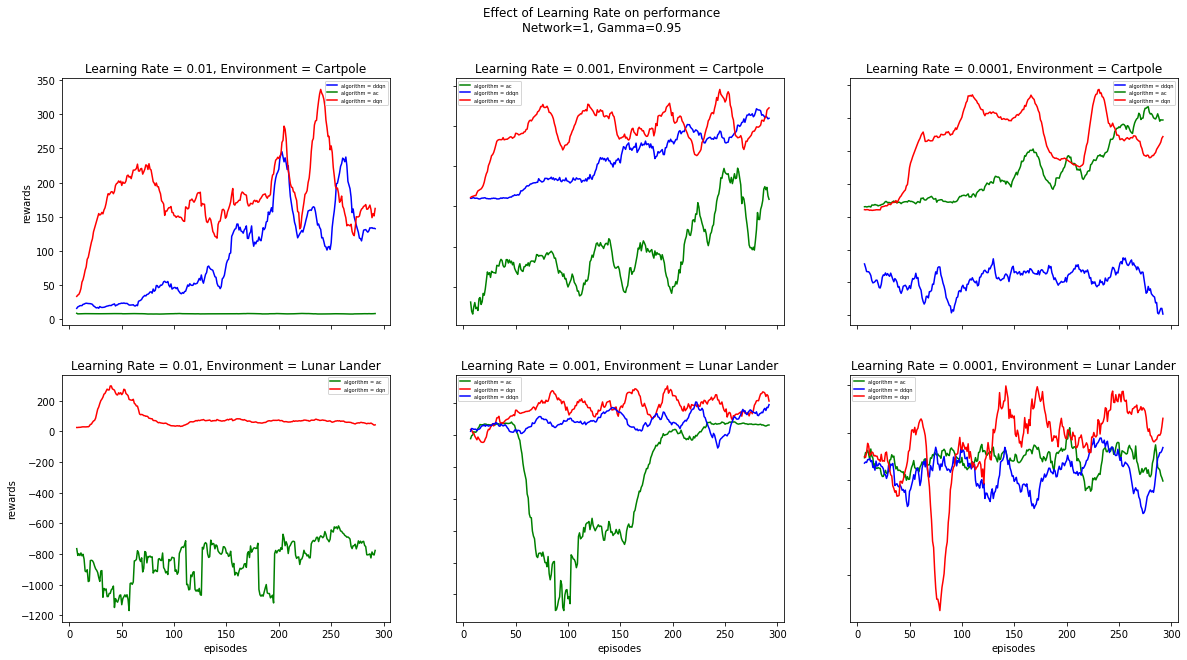

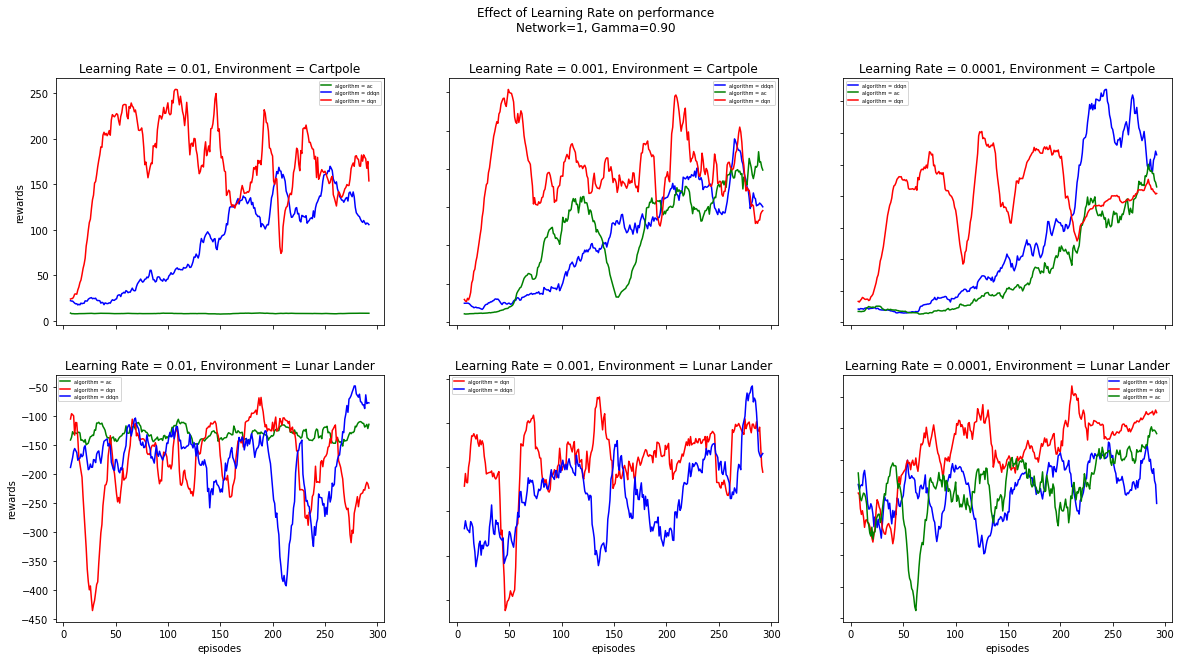

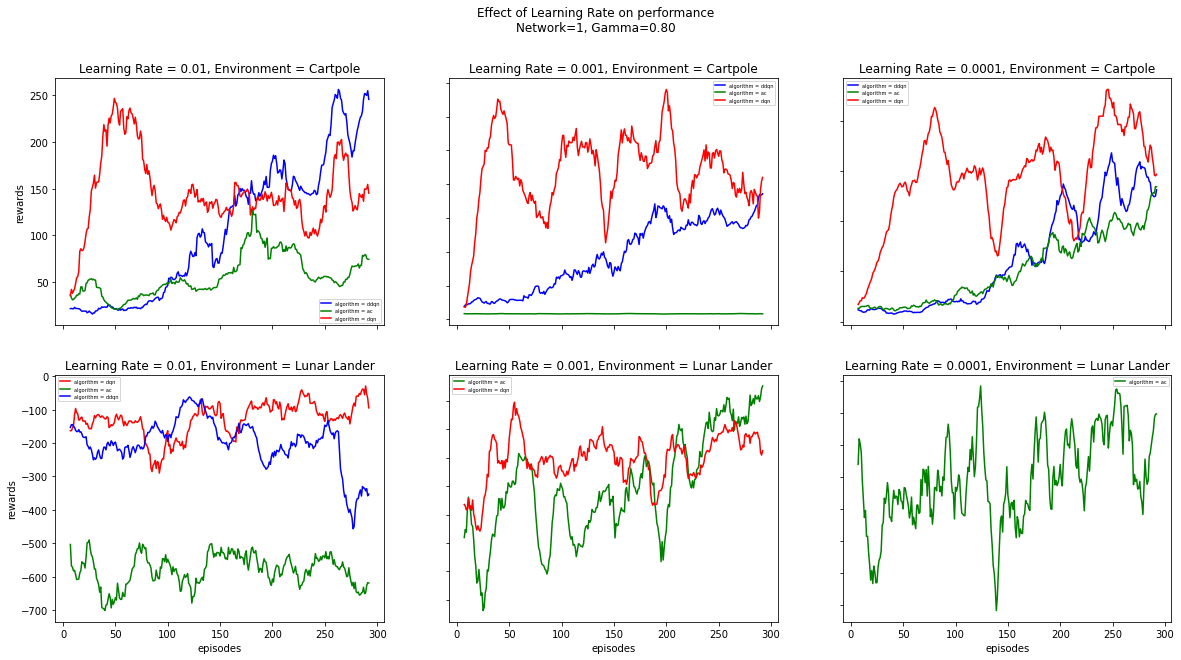

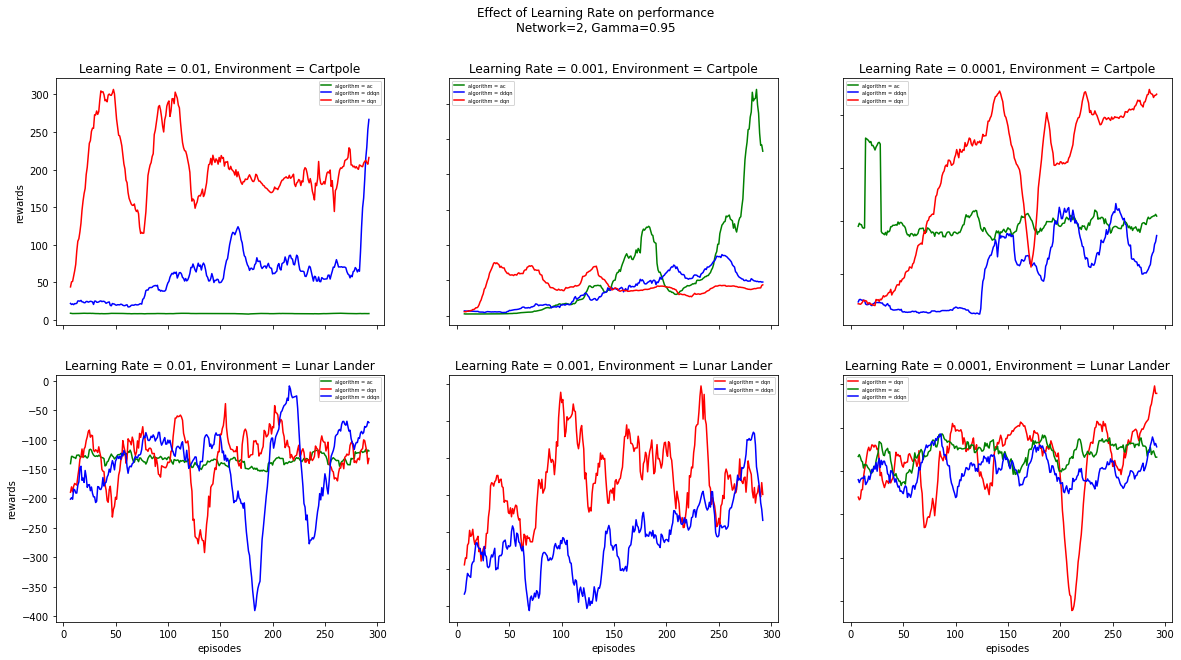

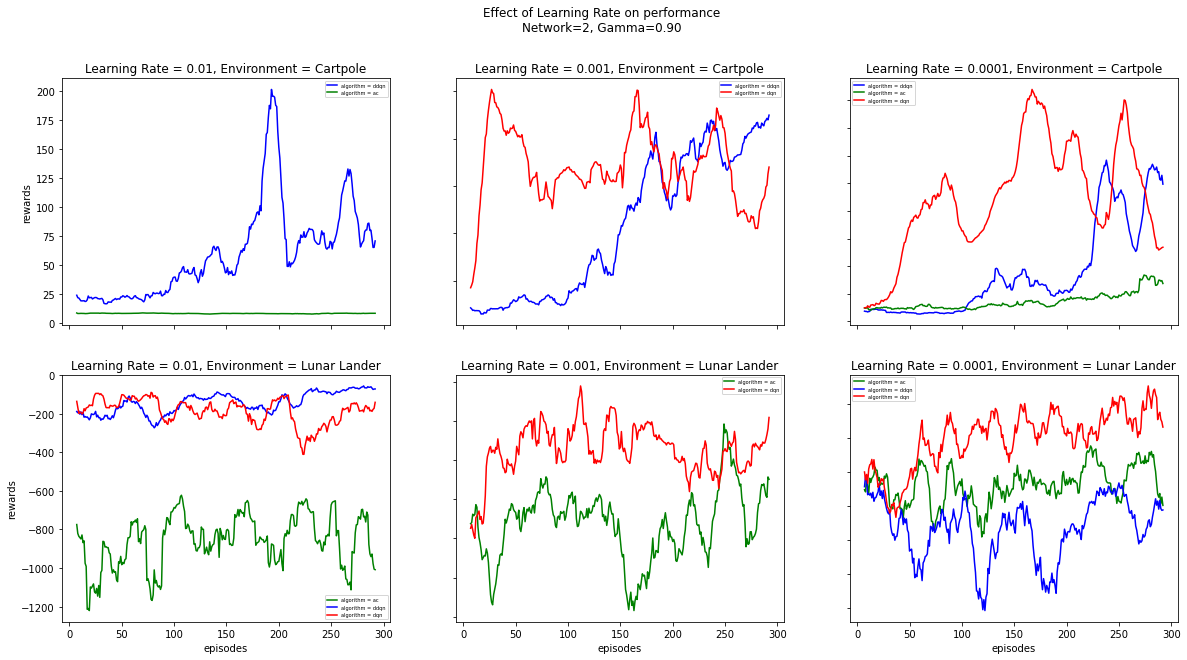

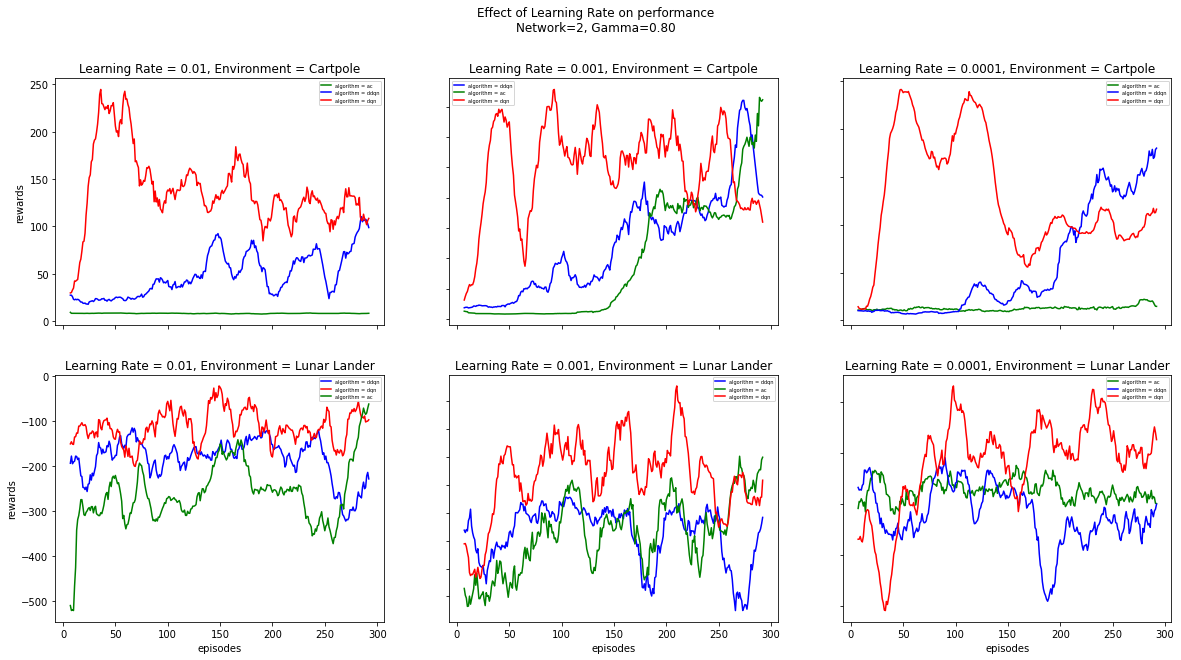

In [69]:
for n in [1, 2]:
    for g in [0.95, 0.9, 0.8]:
        plotter_constLearningRate(slicer(config_df, episodes = 300, network = n, gamma = g))

In [70]:
def plotter_constGamma(final_df):
    fig, axs = plt.subplots(2, 3, figsize = (20, 10))
    axs[0, 0].set_title("Gamma = 0.80, Environment = Cartpole")
    axs[0, 1].set_title("Gamma = 0.90, Environment = Cartpole")
    axs[0, 2].set_title("Gamma = 0.95, Environment = Cartpole")
    axs[1, 0].set_title("Gamma = 0.80, Environment = Lunar Lander")
    axs[1, 1].set_title("Gamma = 0.90, Environment = Lunar Lander")
    axs[1, 2].set_title("Gamma = 0.95, Environment = Lunar Lander")
    results_dic = {}
    color_dic = {"dqn": "red", "ddqn": "blue", "ac": "green"}

    for env in ['cartpole', 'lunar']:
        for algo in ['dqn', 'ddqn', 'ac']:
            for n in [1, 2]:
                for g in [0.95, 0.9, 0.8]:
                    for lr in [0.01, 0.001, 0.0001]:
                        results_dic[(env, algo, n, g, lr)] = 0

    for ax in axs.flat:
        ax.set(xlabel='episodes', ylabel='rewards')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for index, row in final_df.iterrows():
        env = row["environment"]
        if "lunar" in env:
            env = "lunar"
        lr = row["lr"]
        n = row["network"]
        if n == 11:
            n = 1
        elif n == 22:
            n = 2
        g = row["gamma"]
        experiment = row["experiment"]
        algo = row["algorithm"]

        csv_df = pd.read_csv(experiment).rolling(15).mean() 

        if env == "cartpole":
            if g == 0.8 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 0].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif g == 0.9 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 1].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif g == 0.95 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 2].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1

        elif env == "lunar":
            if g == 0.8 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 0].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif g == 0.9 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 1].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif g == 0.95 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 2].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1


    axs[0, 0].legend(prop={'size': 5})
    axs[0, 1].legend(prop={'size': 5})
    axs[0, 2].legend(prop={'size': 5})
    axs[1, 0].legend(prop={'size': 5})
    axs[1, 1].legend(prop={'size': 5})
    axs[1, 2].legend(prop={'size': 5})
    fig.suptitle(f"Effect of Gamma on performance\nNetwork={n:d}, Learning Rate={lr:.4f}")
    saveFileName = f"network={n:d}lr={lr:.4f}.png"
    plt.savefig(saveFileName)
#     plt.show()

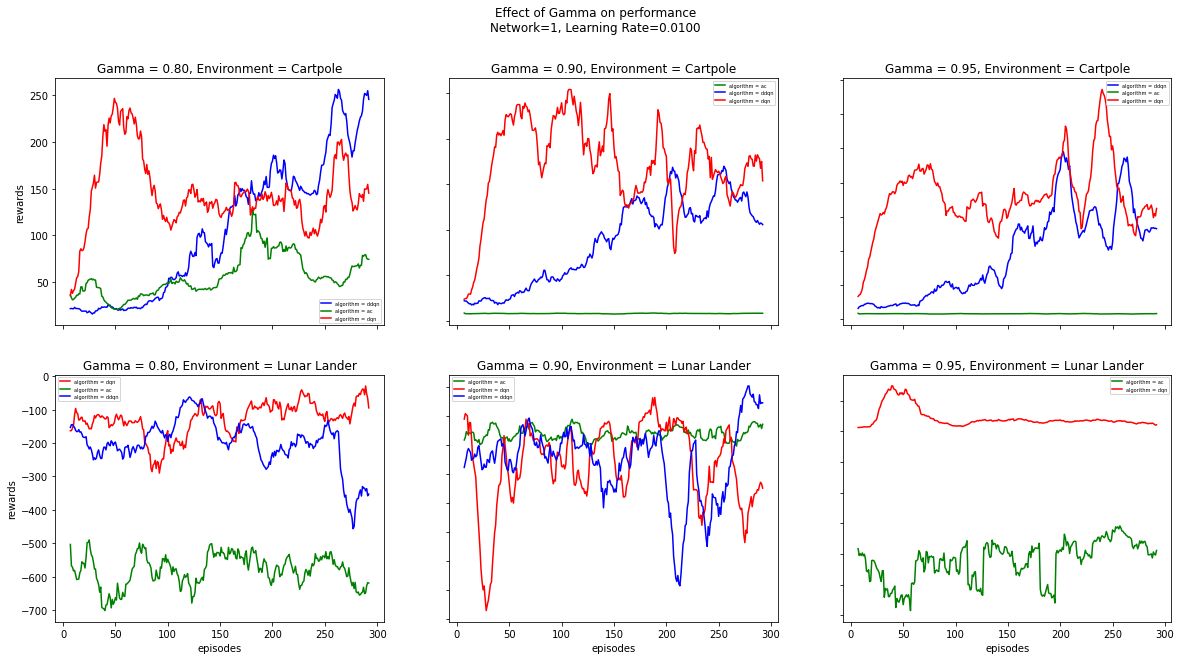

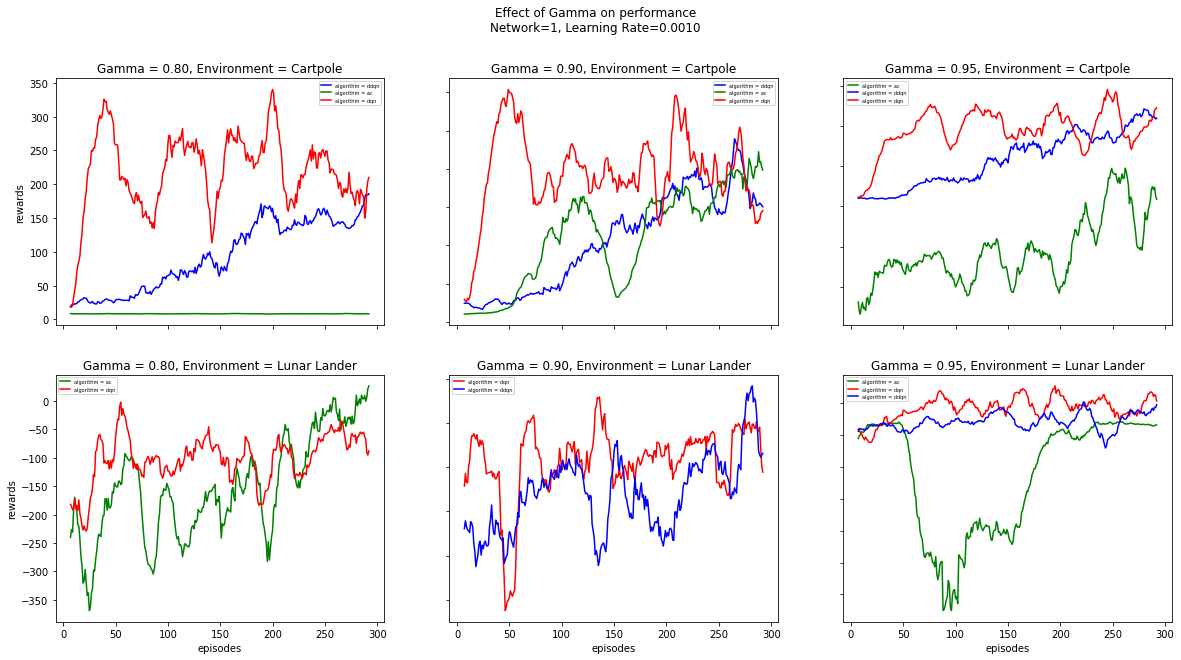

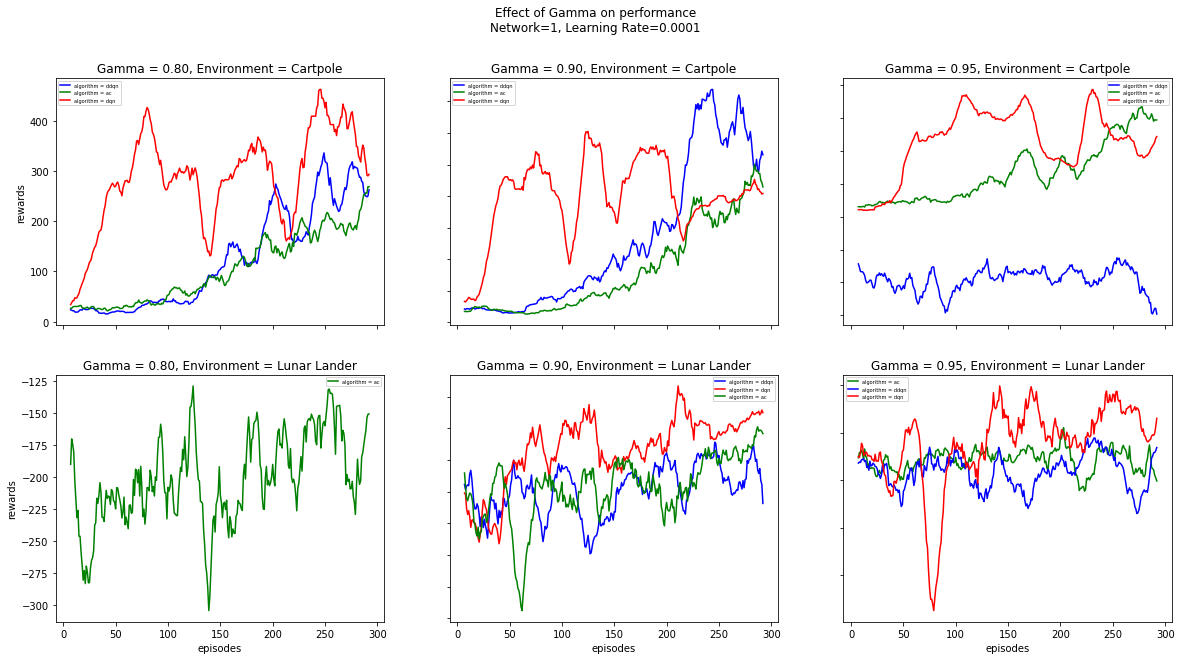

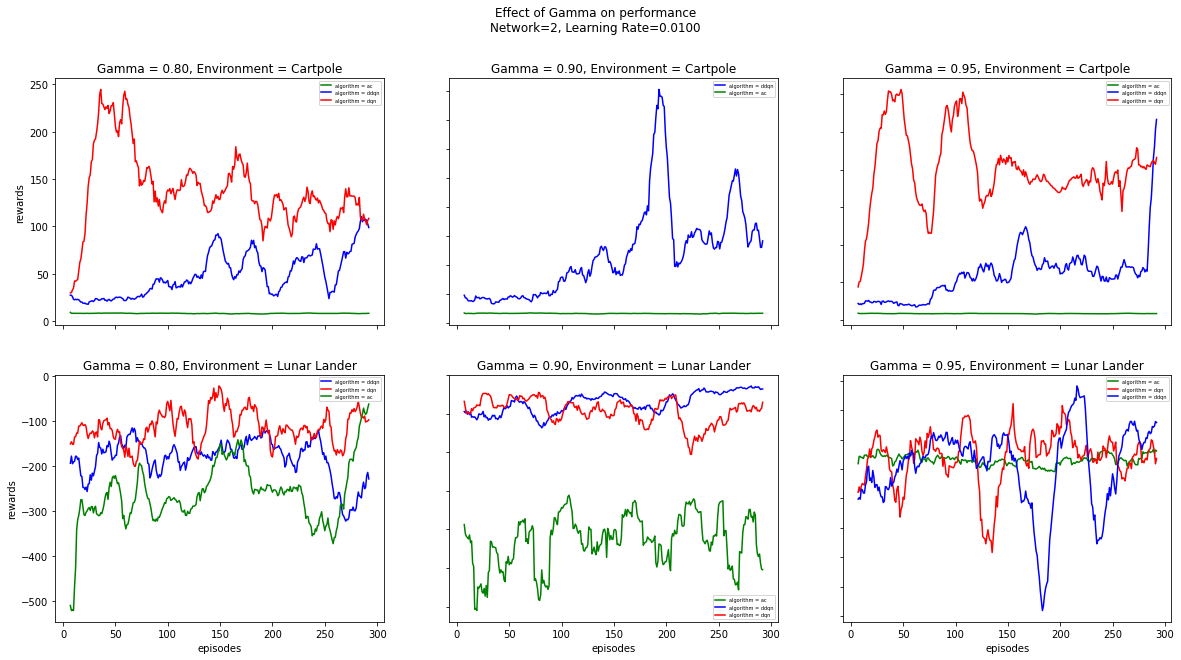

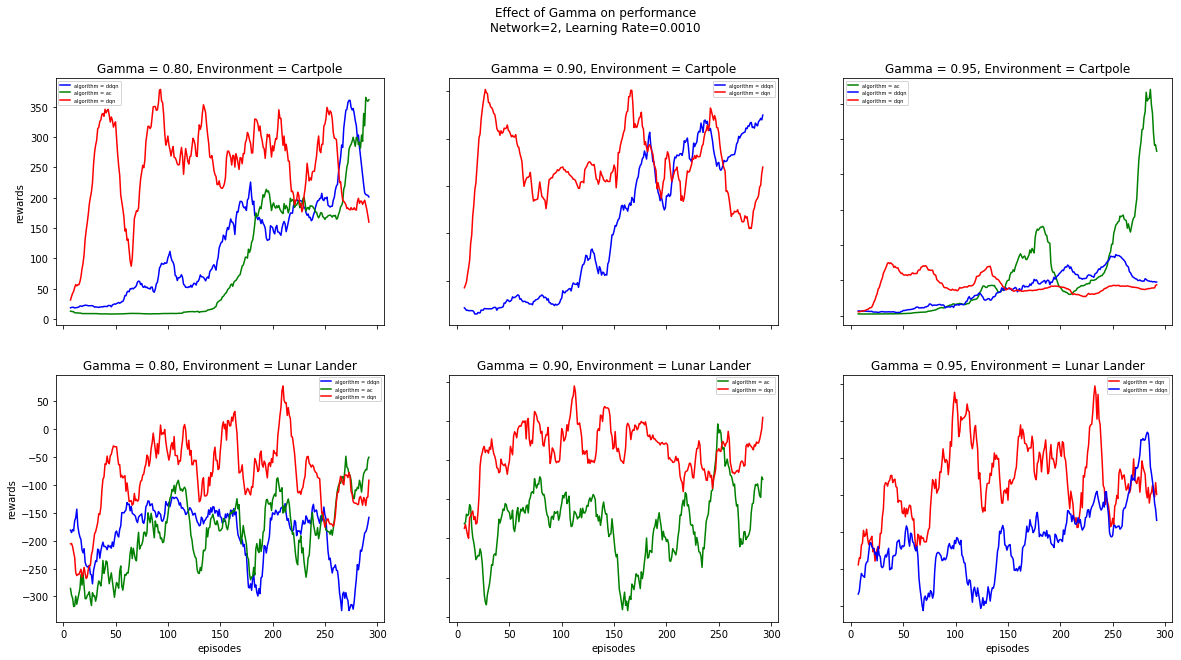

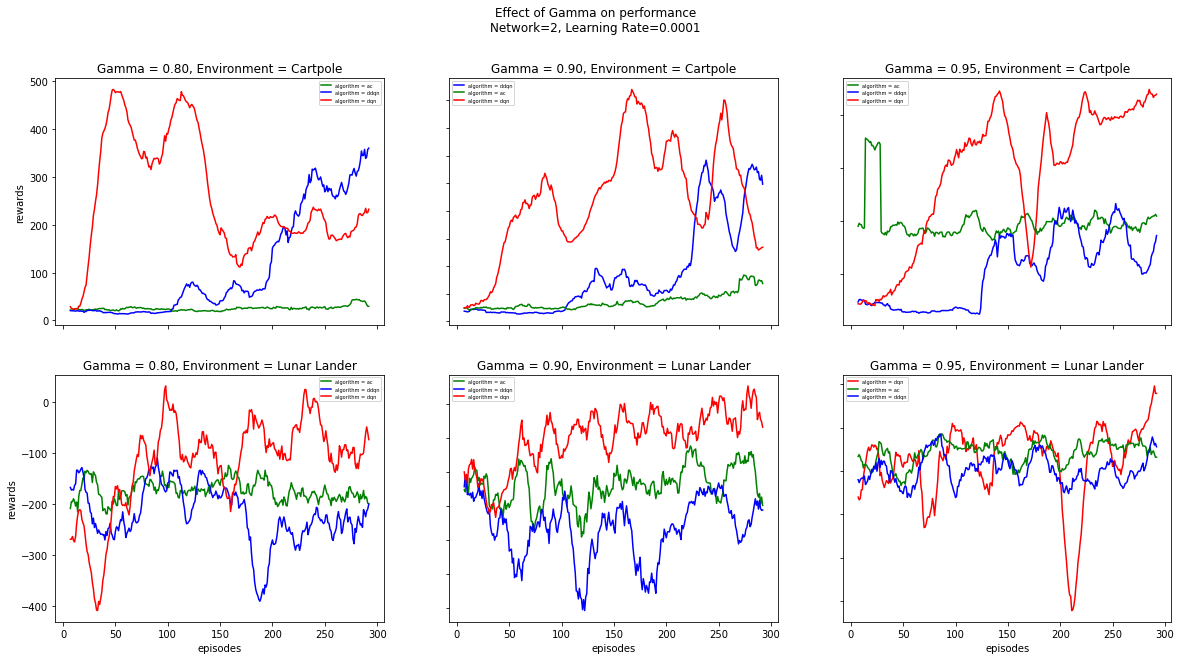

In [71]:
for n in [1, 2]:
    for l in [0.01, 0.001, 0.0001]:
        plotter_constGamma(slicer(config_df, episodes = 300, network = n, lr = l))

In [72]:
def plotter_constNetwork(final_df):
    fig, axs = plt.subplots(2, 2, figsize = (20, 10))
    axs[0, 0].set_title("Network = 1, Environment = Cartpole")
    axs[0, 1].set_title("Network = 2, Environment = Cartpole")
    axs[1, 0].set_title("Network = 1, Environment = Lunar Lander")
    axs[1, 1].set_title("Network = 2, Environment = Lunar Lander")
    results_dic = {}
    color_dic = {"dqn": "red", "ddqn": "blue", "ac": "green"}

    for env in ['cartpole', 'lunar']:
        for algo in ['dqn', 'ddqn', 'ac']:
            for n in [1, 2]:
                for g in [0.95, 0.9, 0.8]:
                    for lr in [0.01, 0.001, 0.0001]:
                        results_dic[(env, algo, n, g, lr)] = 0

    for ax in axs.flat:
        ax.set(xlabel='episodes', ylabel='rewards')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    for index, row in final_df.iterrows():
        env = row["environment"]
        if "lunar" in env:
            env = "lunar"
        lr = row["lr"]
        n = row["network"]
        if n == 11:
            n = 1
        elif n == 22:
            n = 2
        g = row["gamma"]
        experiment = row["experiment"]
        algo = row["algorithm"]

        csv_df = pd.read_csv(experiment).rolling(15).mean() 

        if env == "cartpole":
            if n == 1 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 0].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif n == 2 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[0, 1].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1

        elif env == "lunar":
            if n == 1 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 0].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1
            elif n == 2 and results_dic[(env, algo, n, g, lr)] != 1:
                axs[1, 1].plot(csv_df.loc[0:, 'episodes'], csv_df.loc[0:, 'rewards'], label = f"algorithm = {algo:s}", color = color_dic[algo])
                results_dic[(env, algo, n, g, lr)] = 1


    axs[0, 0].legend(prop={'size': 5})
    axs[0, 1].legend(prop={'size': 5})
    axs[1, 0].legend(prop={'size': 5})
    axs[1, 1].legend(prop={'size': 5})
    fig.suptitle(f"Effect of Network on performance\nGamma={g:.2f}, Learning Rate={lr:.4f}")
    saveFileName = f"gamma={g:.2f},lr={lr:.4f}.png"
    plt.savefig(saveFileName)
#     plt.show()

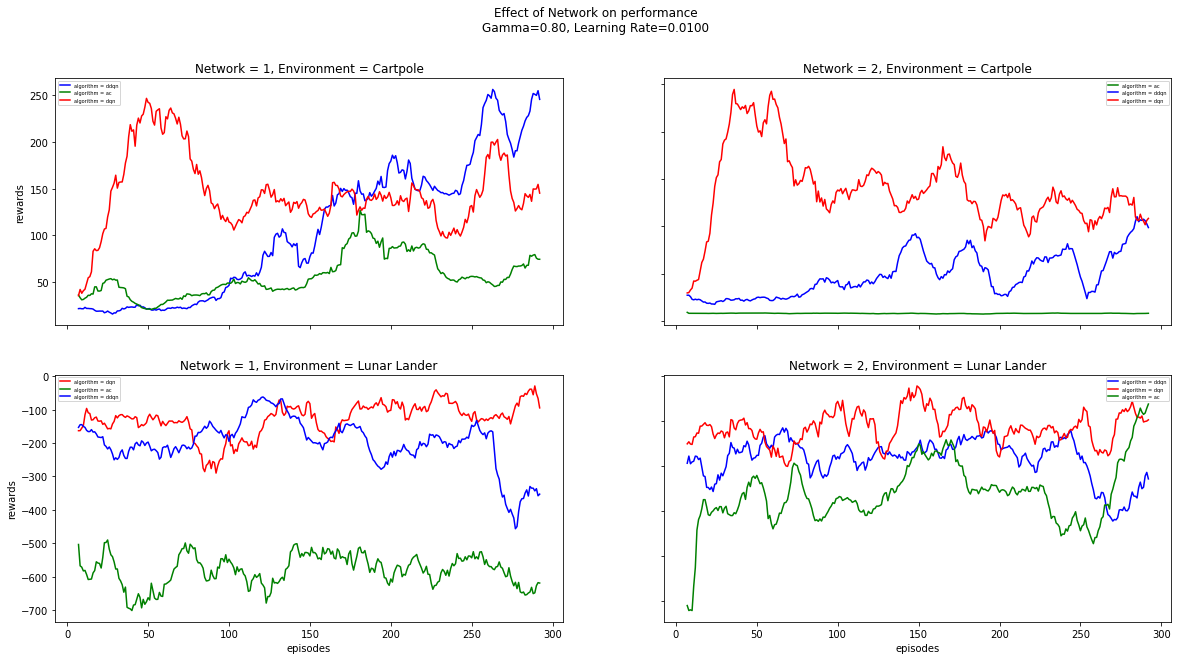

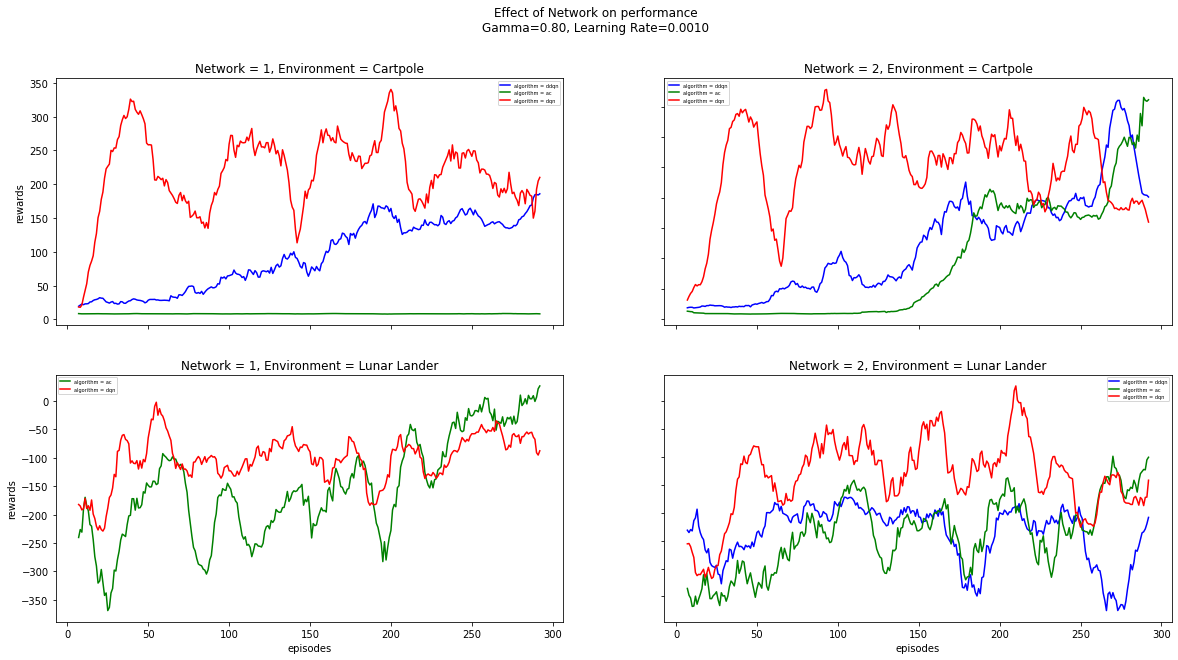

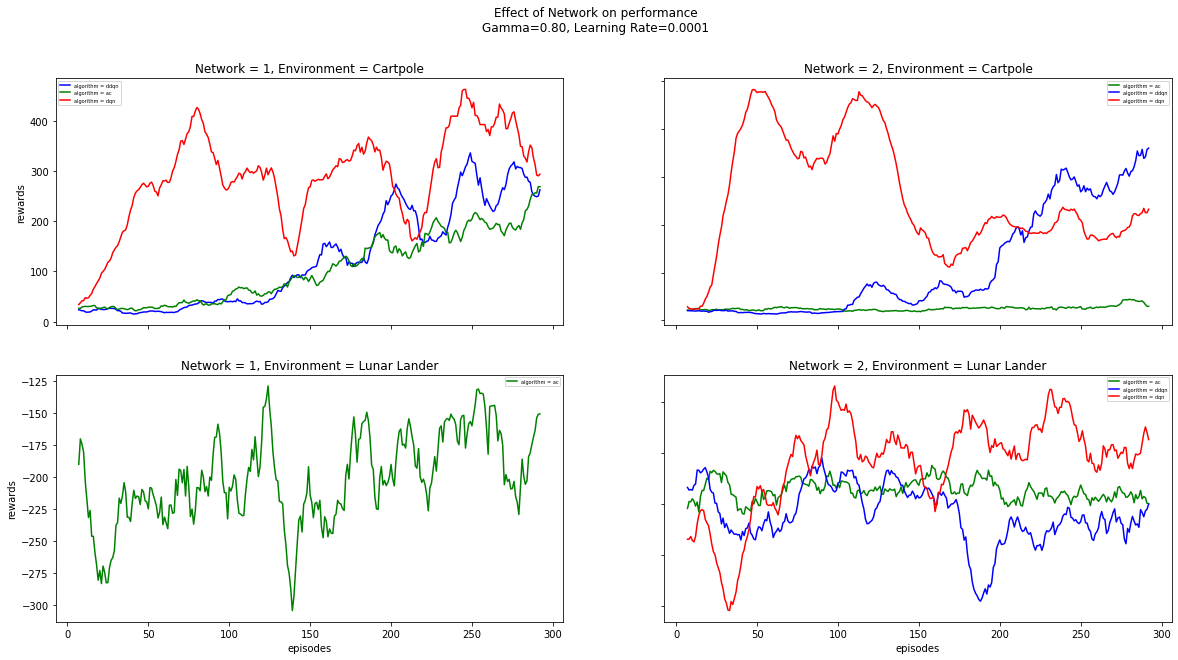

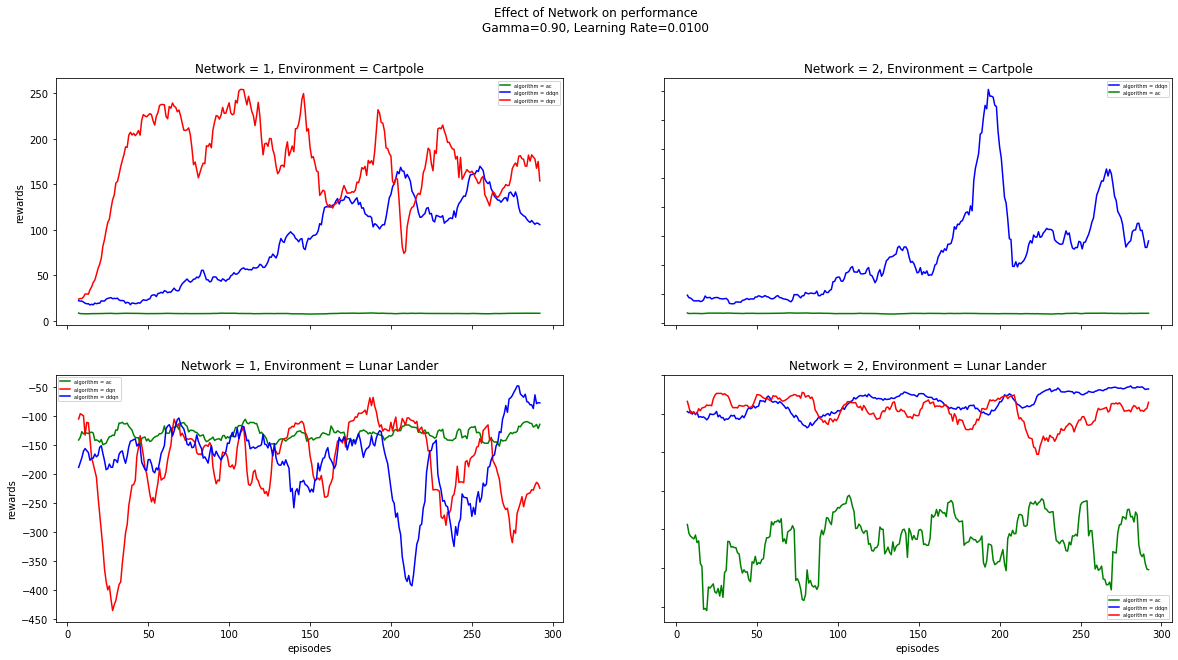

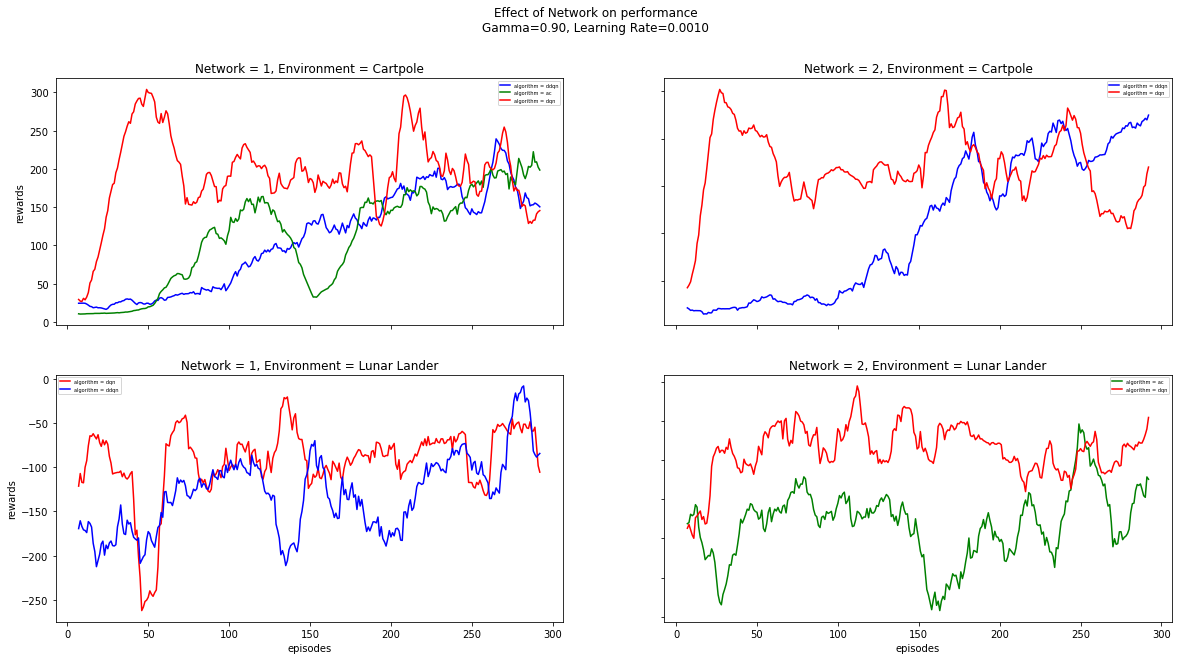

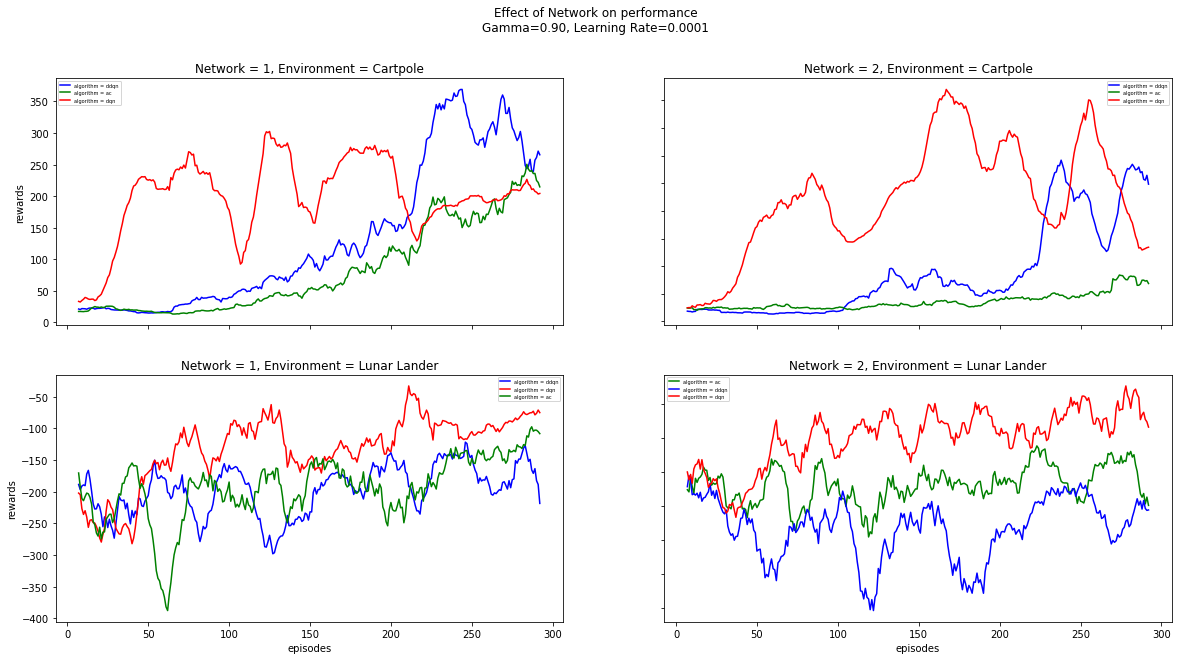

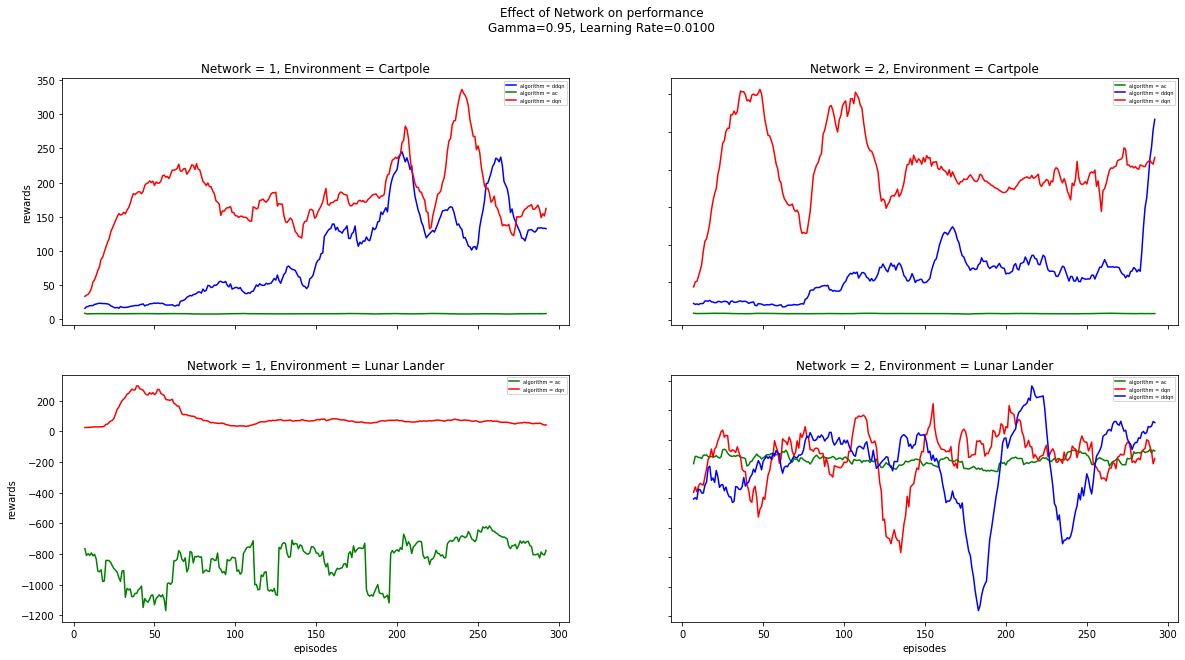

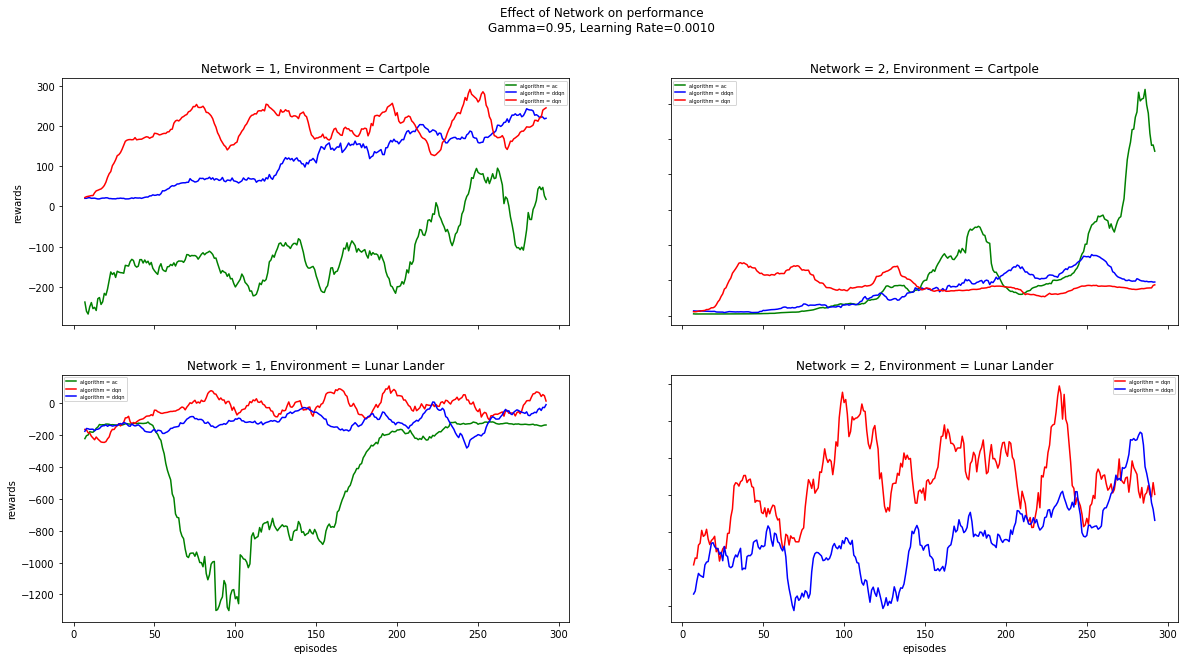

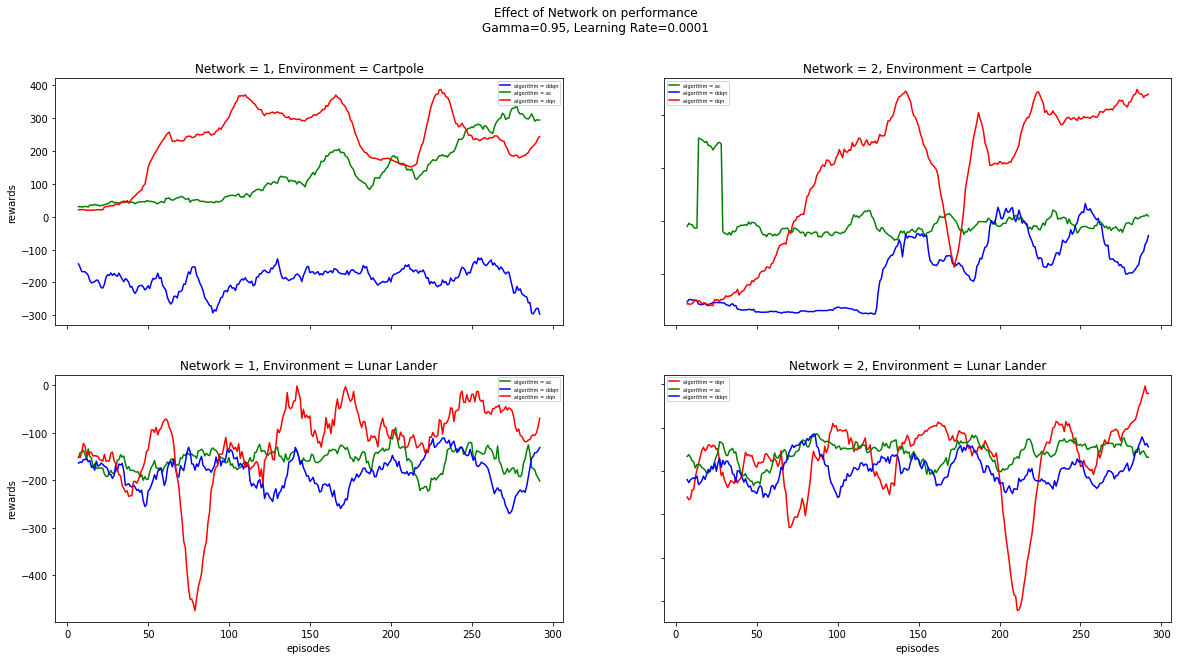

In [73]:
for g in [0.8, 0.9, 0.95]:
    for l in [0.01, 0.001, 0.0001]:
        plotter_constNetwork(slicer(config_df, episodes = 300, lr = l, gamma = g))